<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
from sklearn.preprocessing import binarize
from scipy.stats import skew
from scipy.stats import boxcox

#Read the csv file
df=pd.read_csv('df_wrangled.csv',low_memory=False)

In [ ]:
# Print number of numerical and categorical variables.
df.dtypes.value_counts()

float64    60
object      8
int64       1
dtype: int64

### Missing Values

####  Ideally, the dataset should be divided into train and test sets first, then, missing values of the train set is filled through an imputer, and finally, the imputer is applied on the test set. The distribution of all numerical features will be investigated in the next steps and handling outliers before that will provide a better insight on the distributions; therefore, filling null values is performed on the entire dataset.

In [ ]:
#Create list of all numerical features
numerical_list = df.dtypes[df.dtypes=='float64'].index

# Create a dataframe with columns of numerical_list
df1 = df.loc[:,numerical_list]

# Fill null values with median
df1 = df1.apply(lambda x:x.fillna(x.median()),axis=0)

# Update df with columns of df1
df.update(df1)

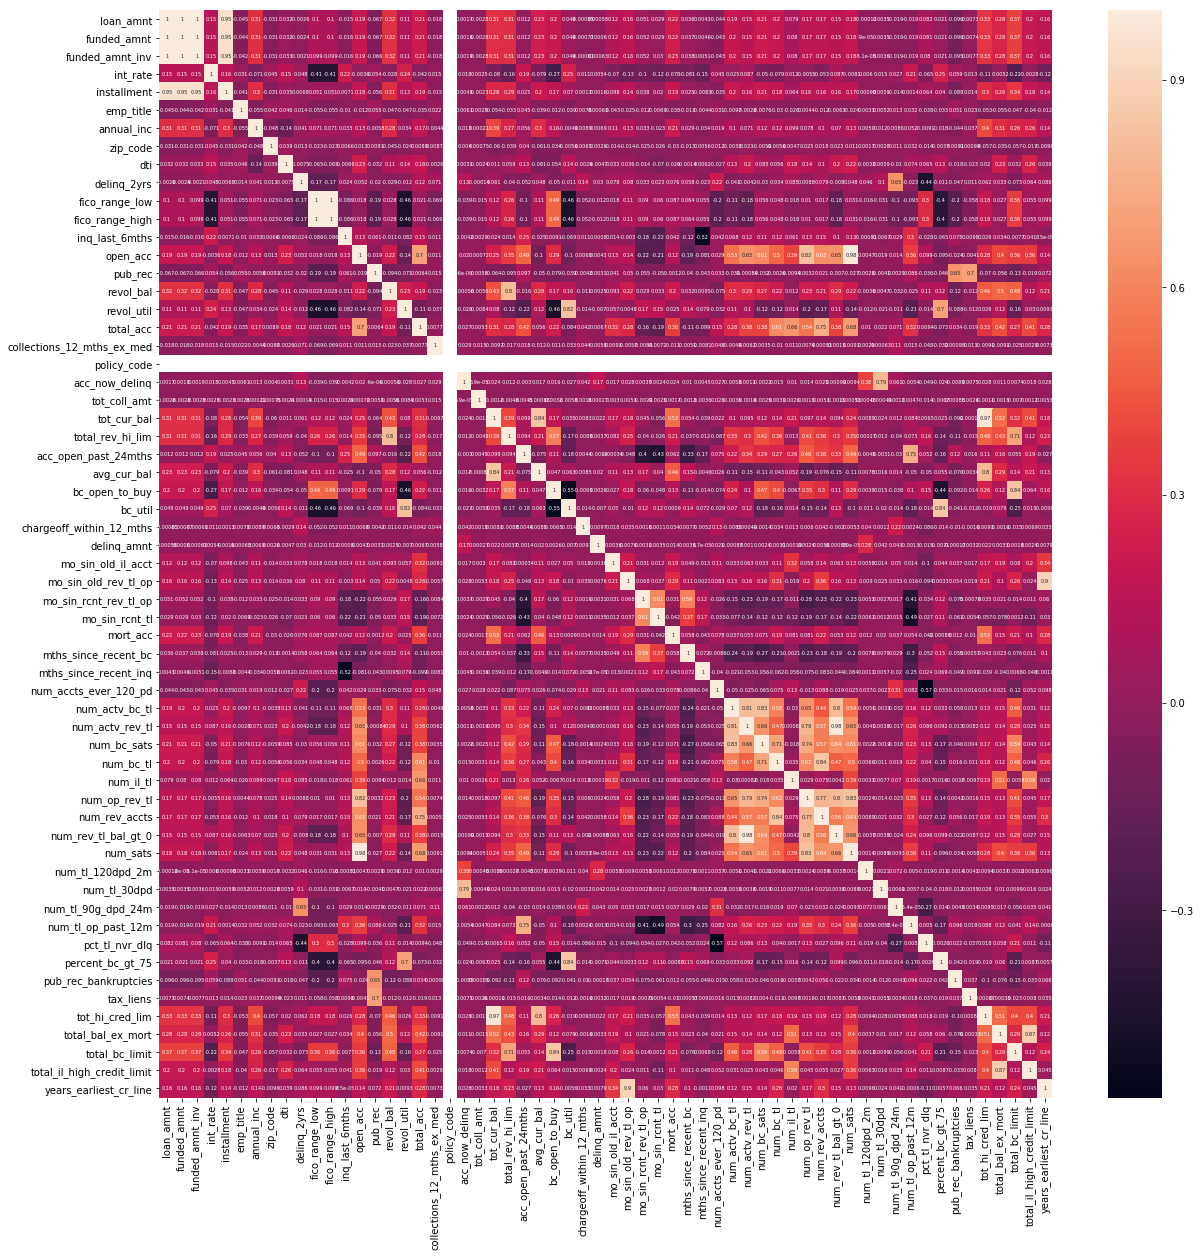

In [ ]:
# Plot the correlation matrix to find highly correlated numerical features
plt.figure(figsize=(20,20))
corr=df.drop('charged_off',axis=1).corr() # Drop response variable column
sns.heatmap(corr,annot=True,annot_kws={"size": 5})
#Save plot in a separate file
mp.savefig('heatmap.png', bbox_inches='tight')

In [ ]:
# First check the row which is totally white.
df.loc[:,'policy_code'].describe()

count    1266618.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [ ]:
# policy_code is 1 across all row, Therefore, it is useless for prediction and must be removed
df.drop('policy_code', axis=1,inplace=True)

In [ ]:
# 1) loan amount, funded amount, invested funded amount, and installment are highly correlated. loan_amnt is kept and the 
# rest are removed.
# 2) fico_range_low (lower boundary range of borrower's FICO score) is removed because it is highly correlated to fico_range_high 
# (upper boundary range of borrower's FICO scores).
# 3) num_sats, which is number of satisfactory accounts, is removed because it is highly correlate to open_acc 
# which is the number of open credit lines in the borrower's credit file.
# 4) tot_hi_cred_lim, which is total high credit/credit limit, is removed because it is highly correlated to tot_cur_bal, 
# which is total current balance of all accounts.
# 5) num_rev_tl_bal_gt_0, which is number of revolving trades with balance more than 0, is removed because it is highly 
# correlated to num_actv_rev_tl, which is number of currently active revolving trades
# 6) mo_sin_old_rev_tl_op, which is number of months since oldest revolving account, is removed because it is highly
# correlated to  years_earliest_cr_line which is number of years since the first credit line


removal_list = ['funded_amnt','funded_amnt_inv','installment','fico_range_low','num_sats','tot_hi_cred_lim',
                'num_rev_tl_bal_gt_0','mo_sin_old_rev_tl_op']

df.drop(removal_list,axis=1,inplace=True)

In [ ]:
df.describe()

,loan_amnt,int_rate,emp_title,annual_inc,charged_off,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,years_earliest_cr_line
count,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,...,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06,1.266618e+06
mean,1.441237e+04,1.326681e+01,6.992591e-01,7.608045e+04,2.011475e-01,9.998940e-01,1.823720e+01,3.175504e-01,7.000093e+02,6.626836e-01,...,8.425429e-02,2.173079e+00,9.437837e+01,4.542289e+01,1.346657e-01,5.185778e-02,4.910055e+04,2.126465e+04,4.143988e+04,1.625771e+01
std,8.682661e+03,4.752450e+00,5.491231e-01,6.991429e+04,4.008582e-01,1.457797e-01,1.080488e+01,8.765928e-01,3.173463e+01,9.440453e-01,...,4.889999e-01,1.794400e+00,8.514614e+00,3.509777e+01,3.782994e-01,3.965001e-01,4.668891e+04,2.105275e+04,4.198775e+04,7.488785e+00
min,5.000000e+02,5.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.290000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,8.000000e+03,9.750000e+00,0.000000e+00,4.580000e+04,0.000000e+00,9.096429e-01,1.179000e+01,0.000000e+00,6.740000e+02,0.000000e+00,...,0.000000e+00,1.000000e+00,9.200000e+01,1.430000e+01,0.000000e+00,0.000000e+00,2.152200e+04,8.000000e+03,1.550000e+04,1.125000e+01
50%,1.200000e+04,1.279000e+01,8.075496e-01,6.500000e+04,0.000000e+00,1.004530e+00,1.760000e+01,0.000000e+00,6.940000e+02,0.000000e+00,...,0.000000e+00,2.000000e+00,9.790000e+01,4.440000e+01,0.000000e+00,0.000000e+00,3.726800e+04,1.500000e+04,3.160000e+04,1.476000e+01
75%,2.000000e+04,1.599000e+01,1.104773e+00,9.000000e+04,0.000000e+00,1.085786e+00,2.402000e+01,0.000000e+00,7.140000e+02,1.000000e+00,...,0.000000e+00,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,6.100900e+04,2.720000e+04,5.451300e+04,2.001000e+01
max,4.000000e+04,3.099000e+01,4.971477e+00,1.099920e+07,1.000000e+00,3.551055e+00,9.990000e+02,3.900000e+01,8.500000e+02,8.000000e+00,...,3.900000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,3.408095e+06,1.105500e+06,2.101913e+06,8.331000e+01


#### There are many features with median value of zeros. Binarizing these features could improve the predicting model if the charged-off ratio is different between zero and non-zero values. The binarized features will be added as new columns after investigating their impact on the response variable. The predicting model will be built once with the original format of the data and once with the binarized format and the results will be compared. 

In [ ]:
#Create list of all numerical features
numerical_list = df.dtypes[df.dtypes=='float64'].index

#  Features with median of 0 in numerical_list are separated 
zero_list = [feature for feature in numerical_list if df.loc[:,feature].median()==0]

# Print number of features with median 0 value in individual_list
len(zero_list)

14

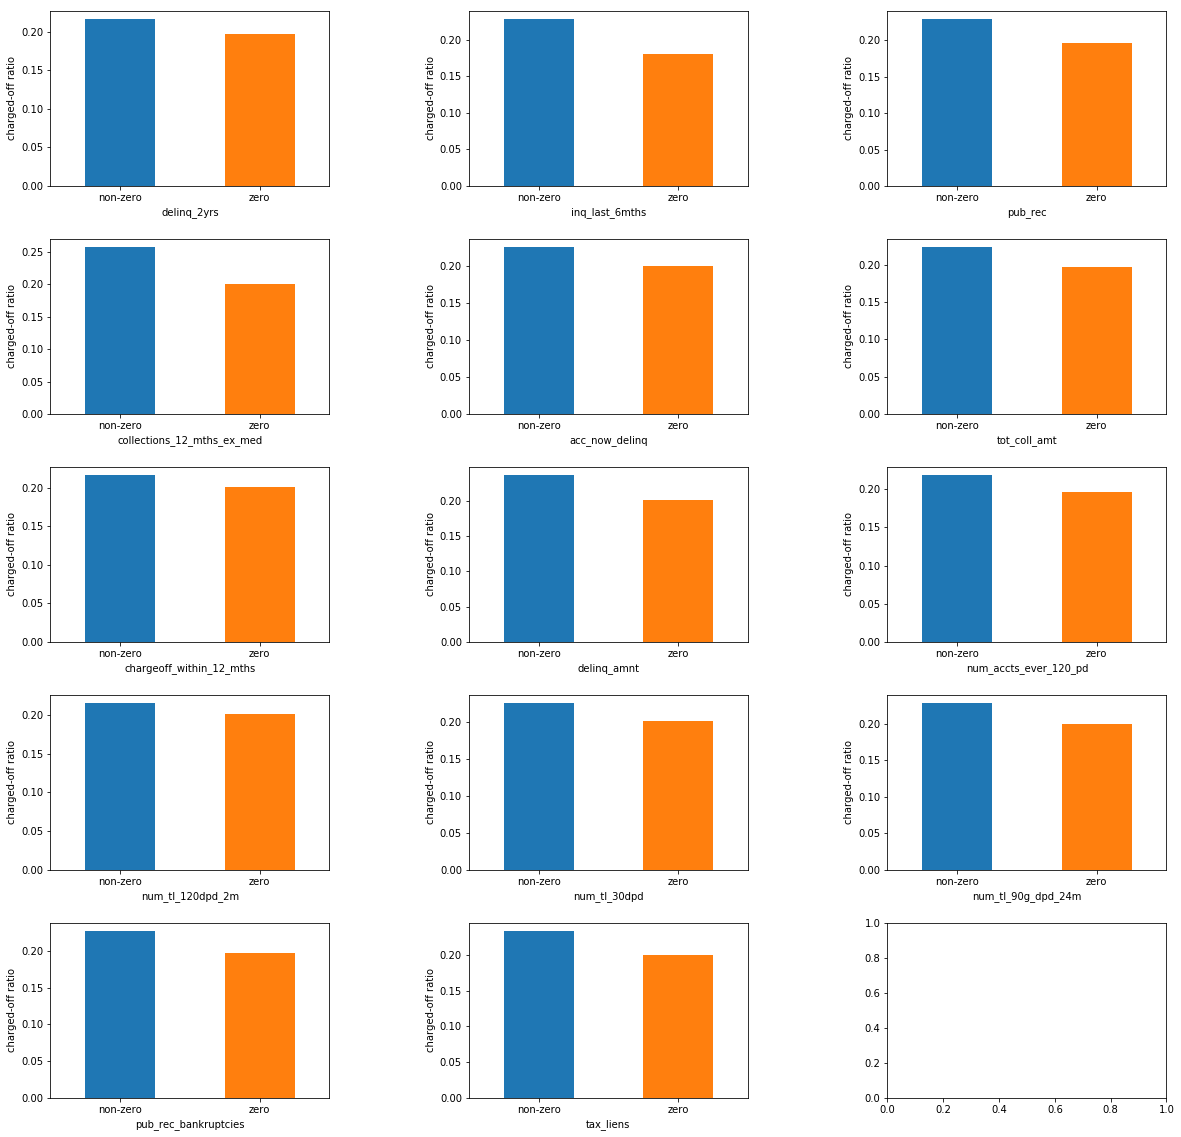

In [ ]:
#Divide the values of features in zero_list to zero and nonzero, and investigate ratio of charged-off loans
# across zero and nonzero values. 

figure, axes = plt.subplots(5,3,figsize=(20,20))
i = 0
new_df = df.loc[:,zero_list+['charged_off']]

for feature in zero_list:
    new_df[feature] = new_df[feature].apply(lambda x: 'zero' if x==0 else 'non-zero')
    ax = axes.reshape(-1)[i]
    (new_df.groupby(feature).mean()['charged_off']).plot.bar(ax=ax)
    ax.set_xlabel(feature)
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    ax.set_ylabel('charged-off ratio')
    i+=1
plt.subplots_adjust(hspace=0.3,wspace=0.5)
mp.savefig('countplot.png', bbox_inches='tight')

In [ ]:
# As it can be seen, the charged-off ratio is different between zero and non-zero values across all features in zero_list.  
# Therefore, these features will be binarized and stored in new columns in a new dataframe at the end of 
# data exploratory analysis

### Outliers

In [ ]:
# A value will be capped if it is more than 99th percentile or the outlier threshold by box plot 
# (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
# A value will be floored if it is less than 1th percentile or the outlier threshold by box plot 
# (which is 25th percentile minus 1.5 interquartile range) whichever is smaller. The outcome will be floored at 0
# because none of the features can have negative values.

def cap_floor(dataframe,feature_list):
    """This function caps and floors outliers in each feature. A value is capped by 99th percentile or 
    the outlier threshold by box plot (which is 75th percentile plus 1.5 interquartile range) whichever is larger.
    A value is floored if it is less than 1th percentile or the outlier threshold by box plot 
    (which is 25th percentile minus 1.5 interquartile range) whichever is smaller; the outcome will be floored at 0."""
    
    df_copy = dataframe.copy()
    # Separate numerical features
    for feature in feature_list:
        # Define different quantiles and IQR
        q1 = dataframe[feature].quantile(0.01)
        q25 = dataframe[feature].quantile(0.25)
        q75 = dataframe[feature].quantile(0.75)
        q99 = dataframe[feature].quantile(0.99)
        iqr = q75-q25
        lower_limit = max(min(q1,q25-1.5*iqr),0)
        upper_limit = max(q99,q75+1.5*iqr)
        df_copy[feature].clip(lower_limit,upper_limit,inplace=True)
    return df_copy

In [ ]:
# Apply cap_floor to df to cap and floor outliers
df = cap_floor(df,numerical_list)

In [ ]:
# Create list of features specific to primary applicant which do not have median value of 0
nonzero_list = [feature for feature in numerical_list if feature not in zero_list]

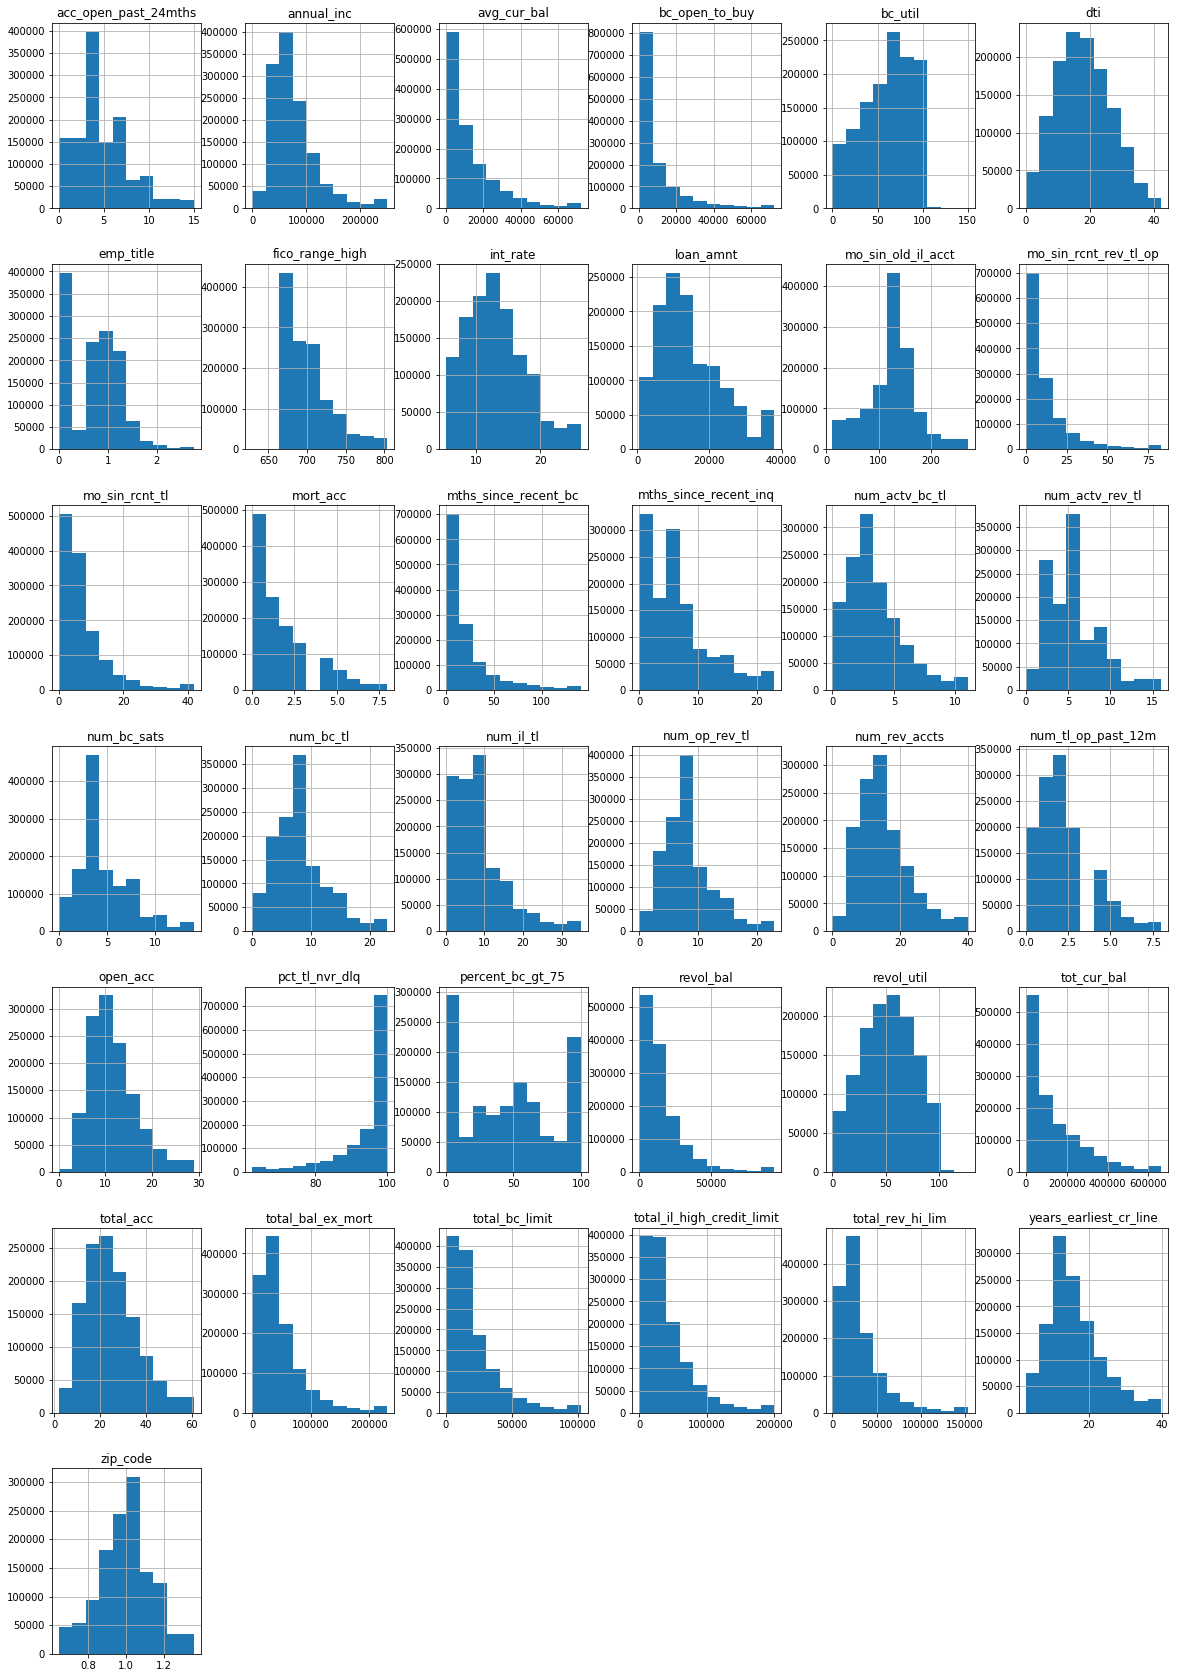

In [ ]:
# Plot histogram of all features in nonzero_list
df.loc[:,nonzero_list].hist(figsize=(20,30))
plt.show()

In [ ]:
# fico_range_high has same outlier on the left.
df.fico_range_high.sort_values().head()

92752      629.0
92632      634.0
1266617    664.0
800604     664.0
800617     664.0
Name: fico_range_high, dtype: float64

In [ ]:
# The two low scores are raised to 664
df.loc[df.fico_range_high<664,'fico_range_high']=664

#revol_util is the amount of credit the borrower is using relative to all available revolving credit and therefore,
# cannot be more than 100. Values beyond 100 are capped at 100.
df.loc[df.revol_util>100,'revol_util']=100

#bc_util is ratio of total current balance to high credit/credit limit for all bankcard accounts. and therefore,
# cannot be more than 100. Values beyond 100 are capped at 100.
df.loc[df.bc_util>100,'bc_util']=100

In [ ]:
# Create list of features with skewness more than 1.5
skewed_list = [feature for feature in nonzero_list if np.abs(skew(df.loc[:,feature]))>1.5]

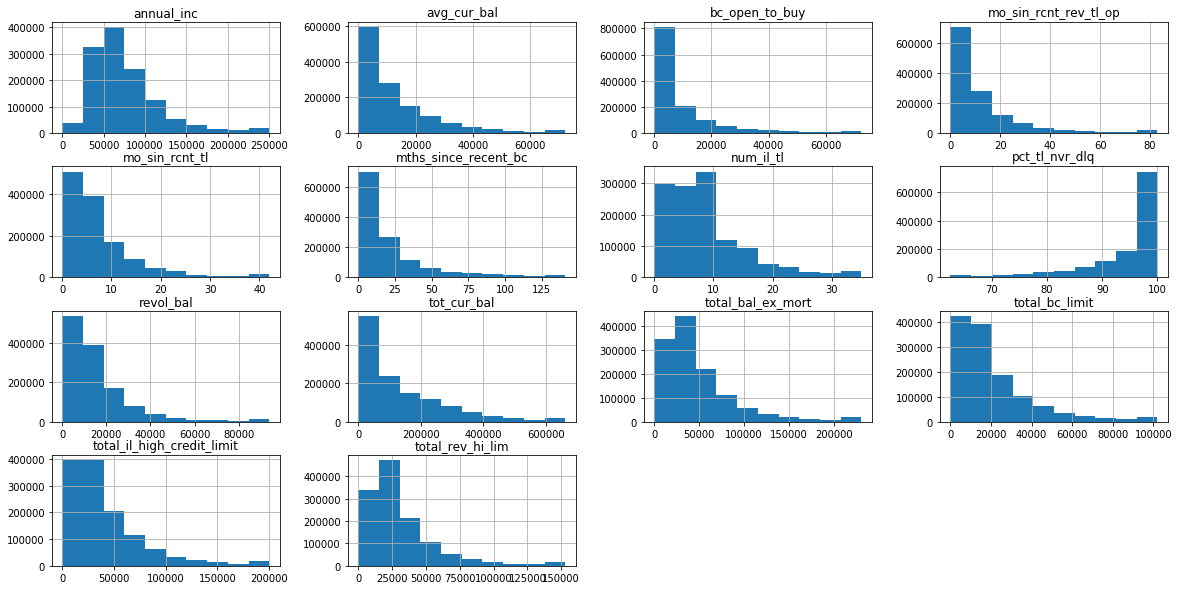

In [ ]:
# Plot highly skewed features
df1=df.loc[:,skewed_list]
df1.hist(figsize=(20,10))
plt.show()

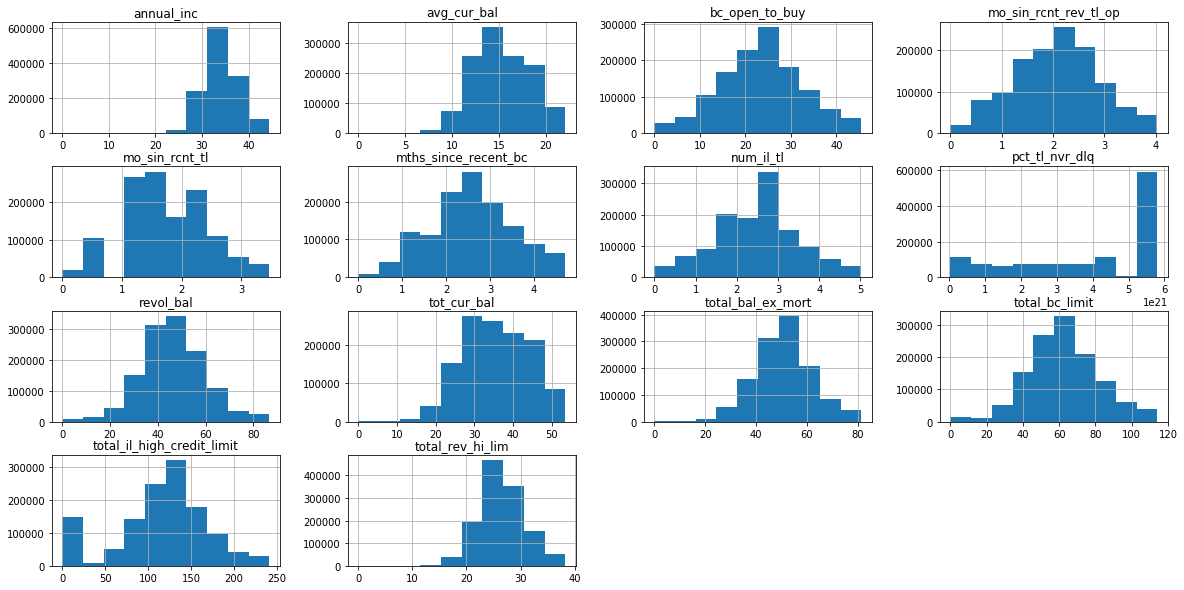

In [ ]:
# Transform highly skewed features with coxbox method
df2=df1.copy()
for feature in skewed_list:
    l, opt_lambda = boxcox(df2[feature]+1)
    df2[feature]=boxcox(df2[feature]+1,lmbda=opt_lambda)
df2.hist(figsize=(20,10))
plt.show()

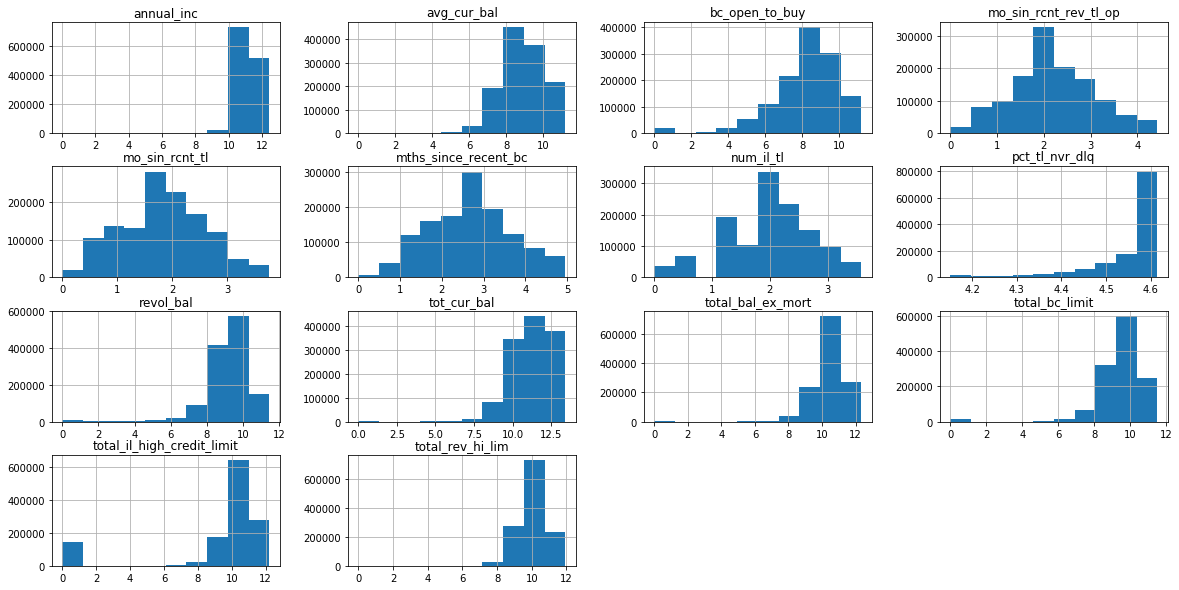

In [ ]:
# Transform highly skewed features with log transform
df2=df1.copy()
df2=df2.apply(lambda x: np.log(x+1))
df2.hist(figsize=(20,10))
plt.show()

In [ ]:
# Pick the better transformation for each feature
skew(df2.loc[:,'pct_tl_nvr_dlq'])
# Create list of features for which coxbox transformation will be used
coxbox_list = ['annual_inc','avg_cur_bal','bc_open_to_buy','mo_sin_rcnt_rev_tl_op','num_il_tl','pct_tl_nvr_dlq',
               'revol_bal','tot_cur_bal','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','total_rev_hi_lim']

# Create list of features for which log transformation will be used
log_list = ['mo_sin_rcnt_tl','mths_since_recent_bc']

df2=df1.copy()

# Apply coxbox transformation
for feature in coxbox_list:
    l, opt_lambda = boxcox(df2[feature]+1)
    df2[feature]=boxcox(df2[feature]+1,lmbda=opt_lambda)

# Apply log transformation
for feature in log_list:
    df2[feature]=np.log(df2[feature]+1)

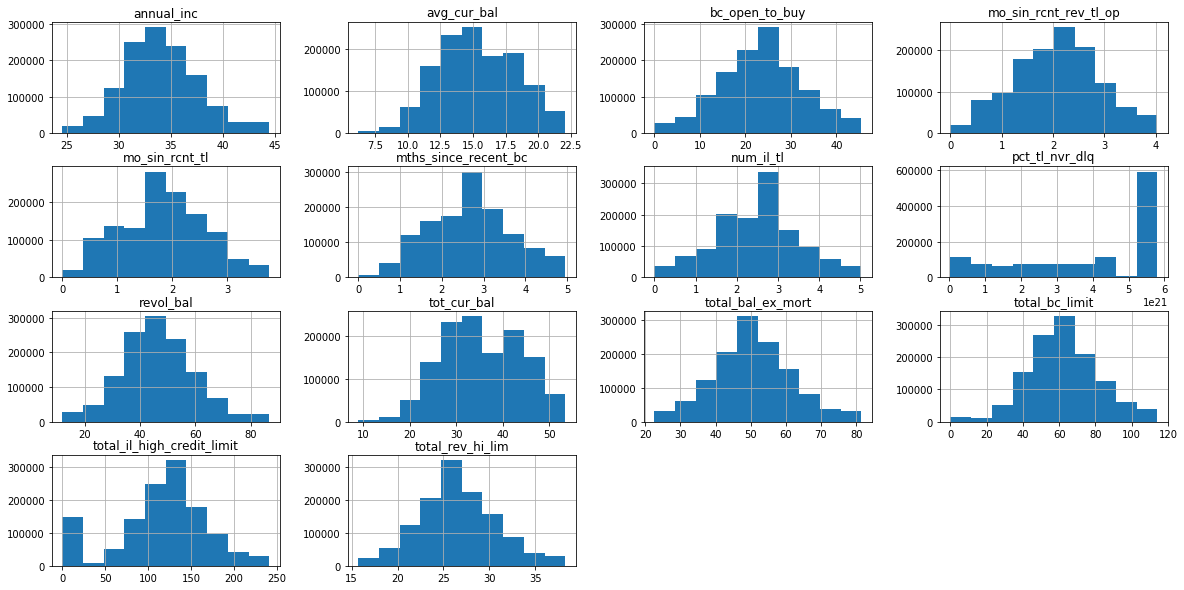

In [ ]:
# Apply cap_floor again on some of the skewed features after transformation
df3=cap_floor(df2,['annual_inc','avg_cur_bal','revol_bal','tot_cur_bal','total_bal_ex_mort','total_rev_hi_lim'])
df3.hist(figsize=(20,10))
plt.show()

#### Two dataframes will be created and used in the Machine Learning section, one is the original format of the data, the other one with binarized and transformed features without their original format.

In [ ]:
#A new dataframe is created 
df_new = df.copy()

# Create binarized format of features in zero_list and remove the original format
for feature in zero_list:
    df_new[feature+'_binarized']=binarize(df_new[feature].values.reshape(-1,1),threshold=0).astype('int')
    del df_new[feature]

# Replace skewed features with transformed format 
df_new.update(df3)

In [ ]:
# Save the two datasets to csv files
df.to_csv('df_original.csv',index=False)
df_new.to_csv('df_new.csv',index=False)